# Logistic Regression

- In **Linear Regression** the dependent variable was continuous and what if it is not continuous then we need to use **Logistic Regression**.

- This is because we cannot classify or quantify the variable data as it is a rare occurence.

- At the end of the analysis we need to measure the accuracy so we will be using this approach.

- The visualization is a linear line in linear regression but it is not in logistic regression because the data is not continuous.

# Data loading and Preparation

In [7]:
%cd /content/drive/MyDrive/Business Analyst Workbooks/Logistic Regression

/content/drive/MyDrive/Business Analyst Workbooks/Logistic Regression


In [8]:
# Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [9]:
# Load the data
df = pd.read_csv("spam.csv")

In [10]:
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


# Data Analysis

In [11]:
# Summary Statistics
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


- We can notice that there is a huge difference between the max value and the 75 % category, that indicates that there are huge number of outliers and we need to deal with them & eliminate them to get a precise solution.

array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

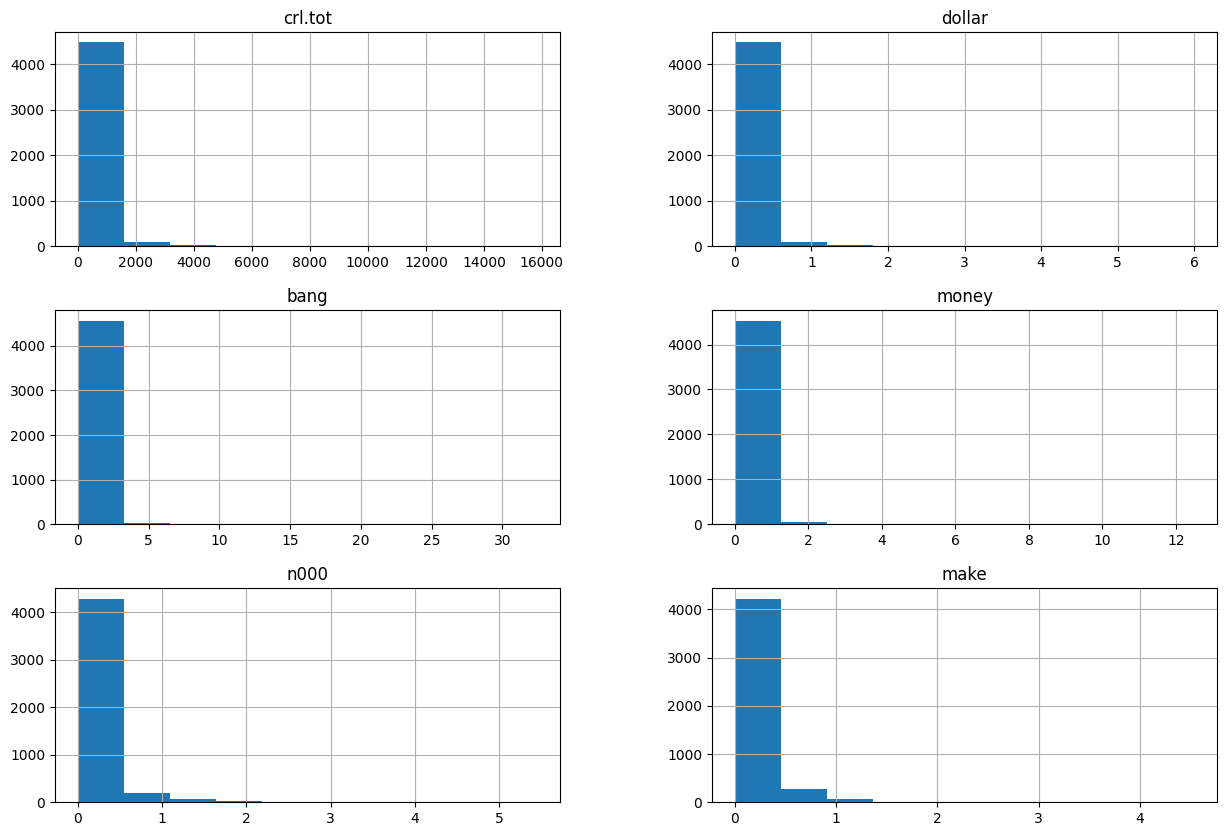

In [14]:
# Histogram
df.hist(figsize=(15,10))

- Through plotting the histogram we can see that the outliers and the necessary data is way too high, that data won't help us so we need to remove the outliers.

In [16]:
# Removing Outliers bit by bit approach
print(len(df))

4601


-  We have 4601 observations so to remove the outliers let's approach step by step and remove it by variable wise.

- From 'crl.tot' let's remove those are above 5000.

In [18]:
df = df[df['crl.tot'] < 5000]
len(df)

4594

- We managed to remove 7 outliers but our visualization has very minor change that indicates we have more work to do.

In [19]:
df = df[df['crl.tot'] < 1500]
len(df)

4462

array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

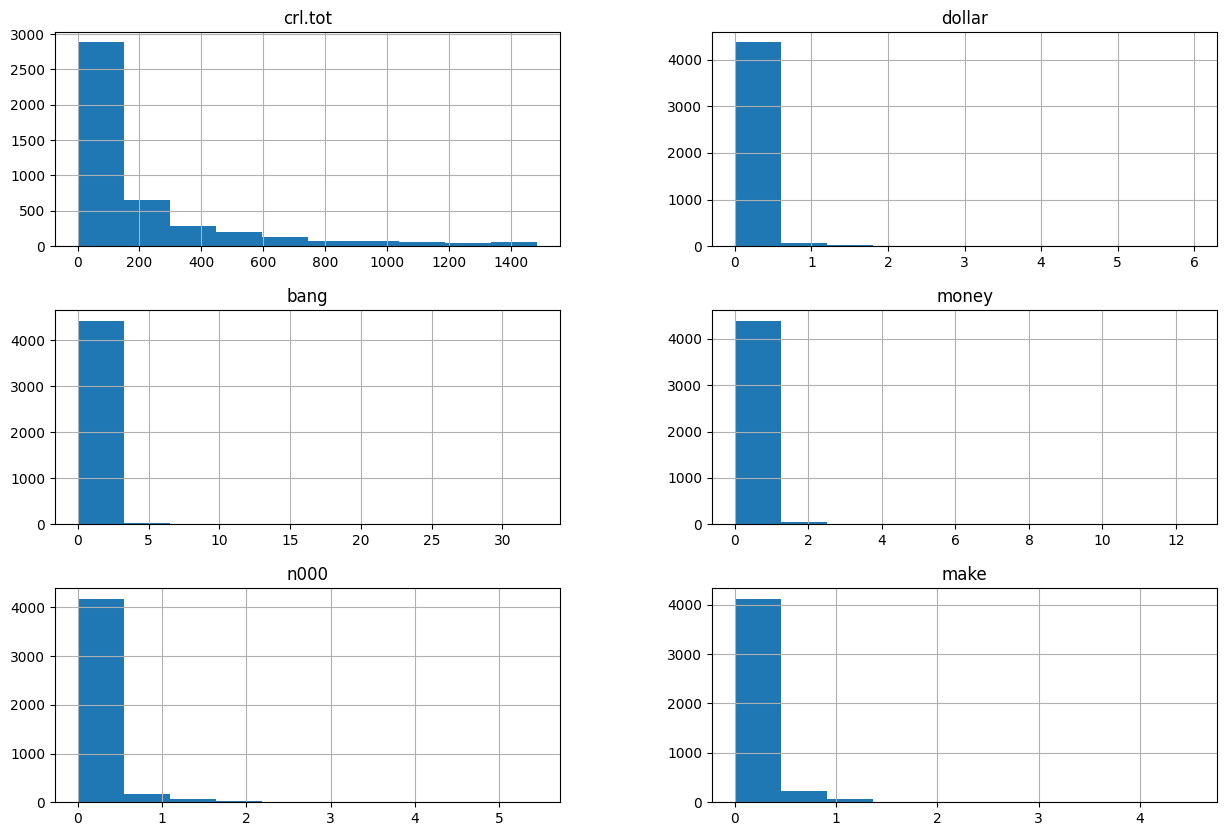

In [20]:
df.hist(figsize=(15,10))

- Let's remove the bang variable data where the count is 5 because it won't make much sense.

4439


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

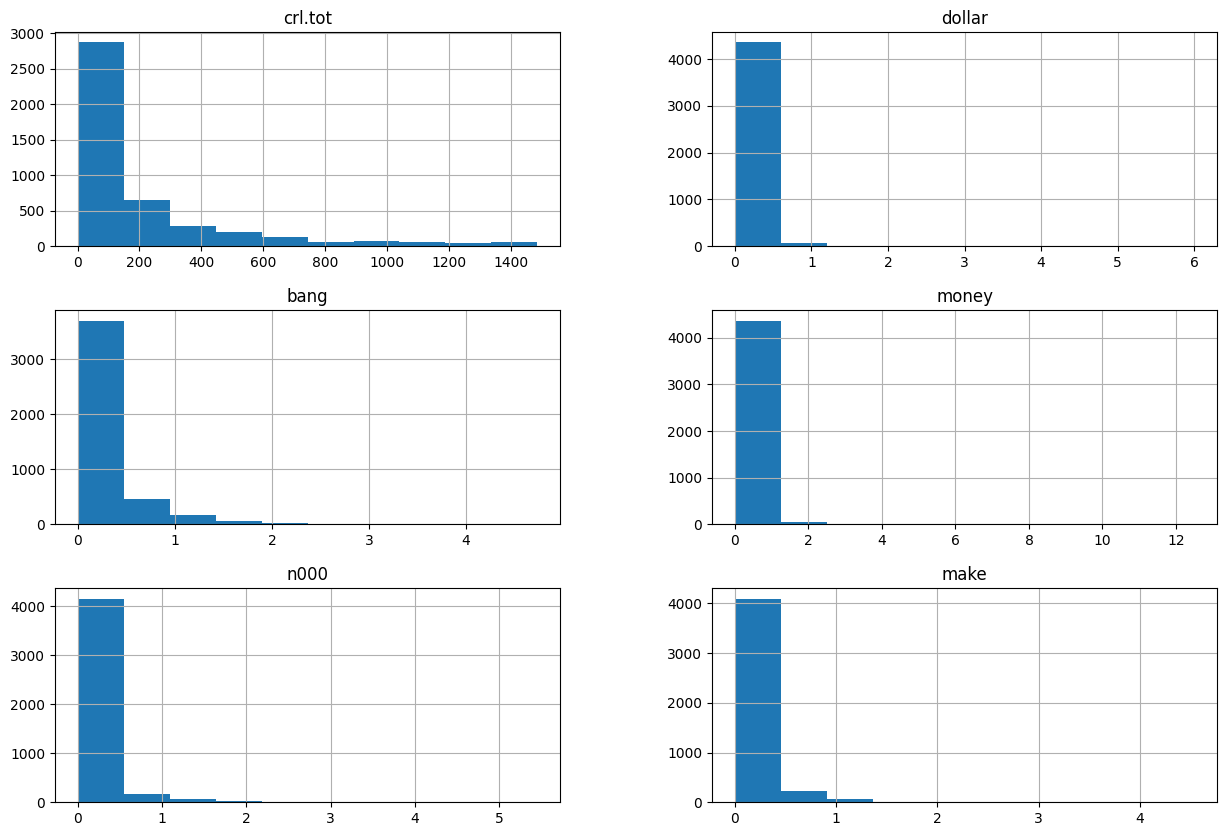

In [21]:
df = df[df['bang'] < 5]
print(len(df))
df.hist(figsize=(15,10))

- We are analyzing the criteria's and based on that we can see what variable makes sense to us and will help in determining the solution, based on that we can remove the money count above 6.

4432


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

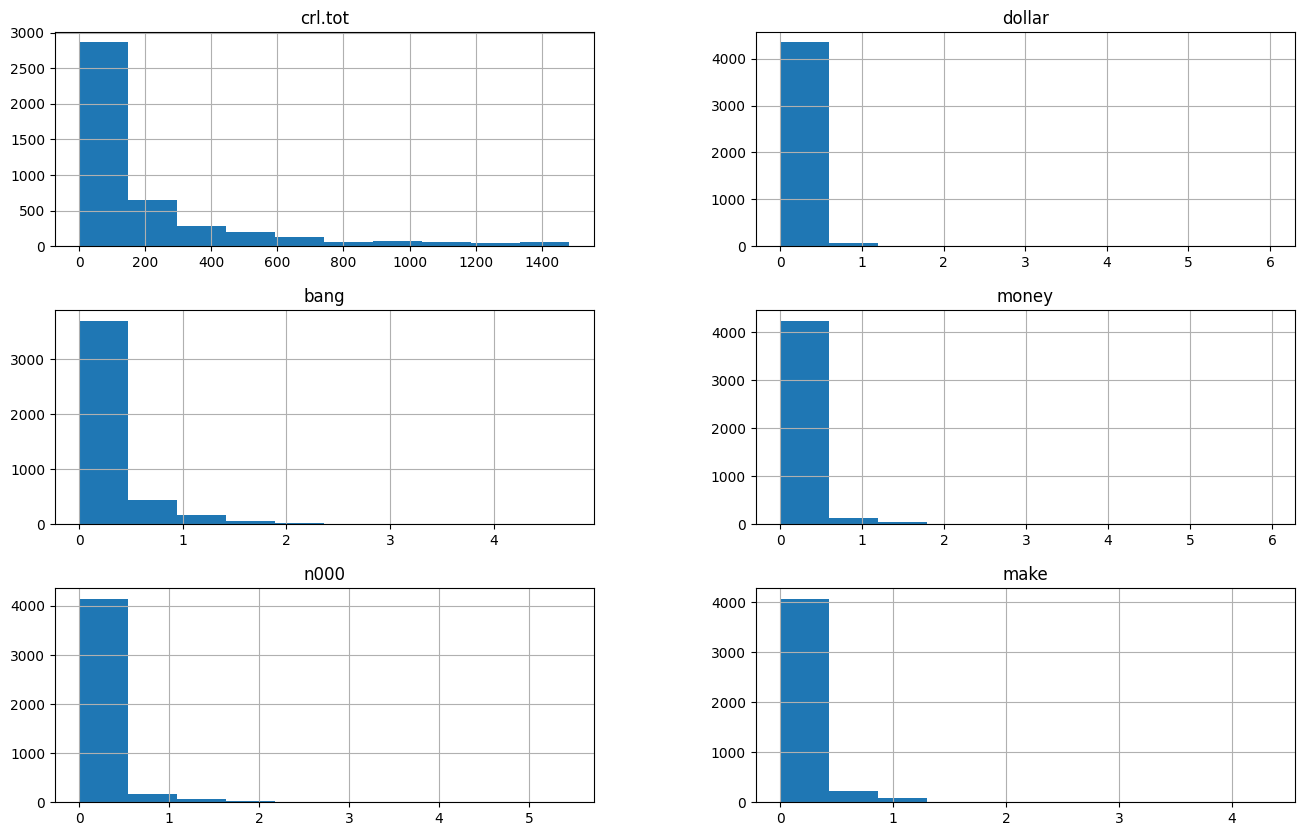

In [23]:
df = df[df['money'] < 6]
print(len(df))
df.hist(figsize=(16,10))

- Now that we have remomved the unecessary outliers, let's do a correlation matrix to determine the relationship between the variables.

<ipython-input-24-87849a62c919>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

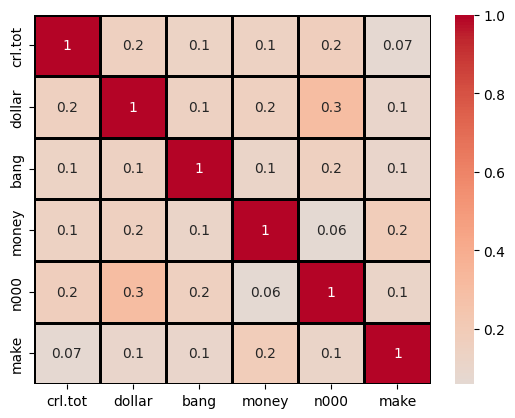

In [24]:
# Matrix
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = 'coolwarm',
            linewidth = 1,
            linecolor = 'black')

# Logistic Regression Preparation

- We have a yes or no criteria and we need to turn it to numeric in order to use it in our analysis to get a conclusion.

In [25]:
df["yesno"] = np.where(df["yesno"] == "y", 1, 0)
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.00,0.778,0.00,0.00,0.00,1
1,1028,0.18,0.372,0.43,0.43,0.21,1
3,191,0.00,0.137,0.00,0.00,0.00,1
4,191,0.00,0.135,0.00,0.00,0.00,1
5,54,0.00,0.000,0.00,0.00,0.00,1


- We just did a if else loop using numpy library where we print 1 if the entry is "y" otherwise we print 0.

In [26]:
# Prepare X and Y
y = df.yesno
y.head()

0    1
1    1
3    1
4    1
5    1
Name: yesno, dtype: int64

In [27]:
# We want every column except the last column in x so we can write to do this
x = df.iloc[:,:-1]
x.head()

,crl.tot,dollar,bang,money,n000,make
0,278,0.00,0.778,0.00,0.00,0.00
1,1028,0.18,0.372,0.43,0.43,0.21
3,191,0.00,0.137,0.00,0.00,0.00
4,191,0.00,0.135,0.00,0.00,0.00
5,54,0.00,0.000,0.00,0.00,0.00


In [28]:
# We need to add a constant using statsmodel
x = sm.add_constant(x)
x.head()

,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21
3,1.0,191,0.00,0.137,0.00,0.00,0.00
4,1.0,191,0.00,0.135,0.00,0.00,0.00
5,1.0,54,0.00,0.000,0.00,0.00,0.00


# Training and Testing data preparation

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

- In **Linear Regression** the probability rise is linear because of a simple equation **y = a + b*x + error**.

- But in Logistic Regression the probability rise is exponeneial and the equation is kind of complicated too **y = [e^(a+b*x)/1 + e^(a+b*x)] + error**.

# Logistic Regression

In [31]:
model = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.386779
         Iterations 8


- The function is working properly and now to print the model summary we can do it by:

In [32]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            6
Date:                Thu, 28 Sep 2023   Pseudo R-squ.:                  0.4210
Time:                        20:31:13   Log-Likelihood:                -1371.1
converged:                       True   LL-Null:                       -2368.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1801      0.074    -29.532      0.000      -2.325      -2.035
crl.tot        0.0017      0.000      8.985      0.000       0.001       0.002
dollar         6.5798      0.682      9.652      0.0

- Through the summary we can see that **make** is statistically insignificant and other variables are highly correlated by looking at P > |z| value.

- We will create a function between variables to attain clarity.

In [35]:
# Create a Function
def logistic_reader(coefficient):
  probability = round((np.exp(coefficient) - 1) * 100, 2)
  if probability > 0:
    print("The likelihood increases by", probability, "%")
  elif probability == 0:
    print("No Impact")
  else:
    print("The likelihood decreases by", probability, "%")

In [36]:
# Apply the Function
logistic_reader(0.0017)

The likelihood increases by 0.17 %


# Assess the Model

In [39]:
# Predictions
predictions = model.predict(x_test)
predictions = np.where(predictions > 0.5, 1, 0)
predictions[:5] # Predictions is an array .head() won't work

array([1, 0, 0, 0, 0])

# Confusion Matrix

- Now that we have the data prepared we will draw out a confusion matrix where the actual and predicted data is compared and it is a 2 X 2 matrix.

- There will be 4 outcomes from those matrix and they are:

1.   True Negative
2.   True Positive
3.   False Negative
4.   False Positive



- From that matrix we can measure **accuracy** if the dataset is balanced otherwise we can measure **F1 Score**.

- **Accuracy** is the ratio of sum of true positive and true negative by all outcomes.

- **F1 score** is determined using this formula:

- F1 Score = 2 * TP / (2 * TP + FP + FN)

- Specificity formula goes something like this

- Specificity = True Negative / (True Negative + False Positive)

- Sensitivity formula goes something like this

- Sensitivity = True Positive / (True Positive + False Negative)

- When we focus on determining the false values accuracy we use **Specificity** and if we are determining true values accuracy we use **Sensitivity**.

In [40]:
# To check if the dataset is balanced or not we need check by
y_test.mean()

0.35400225479143177

- If the outcome is below 0.3 then the dataset is not balanced else we are good to go.

In [45]:
# Drawing Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[524,  49],
       [102, 212]])

- The outcome is bit confusing and it is not easy tp figure out what is what so let's organize it using this.

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [47]:
tn

524

In [48]:
fp

49

In [49]:
fn

102

In [50]:
tp

212

In [52]:
# Determining Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy:", round(accuracy, 2), "%")

# Determining F1 Score
f1 = 2 * tp / (2 * tp + fn + fp)
print("F1 Score:", round(f1 * 100, 1), "%")

# Specificity
spec = tn / (tn + fp)
print("Specificity:", round(spec*100, 1), "%")

# Sensitivity
sens = tp / (tp + fn)
print("Sensitivity:", round(sens*100,1), "%")

Accuracy: 0.83 %
F1 Score: 73.7 %
Specificity: 91.4 %
Sensitivity: 67.5 %


# Classification Report

In [53]:
from sklearn.metrics import  classification_report

In [54]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       573
           1       0.81      0.68      0.74       314

    accuracy                           0.83       887
   macro avg       0.82      0.79      0.81       887
weighted avg       0.83      0.83      0.83       887

